#Setting Environment

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import xml.etree.ElementTree as ET
from sklearn import metrics

In [2]:
PATH ='/content/drive/MyDrive/Dataset/DogBreed/'
img_dir = PATH+"images/Images"
ant_dir = PATH+"annotations/Annotation"

X=[] 
Y=[] 
bnd_dict = {}
nclasses=10

#Preprocessing

In [3]:
label_count = 0
for sub_dir in os.listdir(ant_dir):
    label_count += 1 
    label = sub_dir.split("-")[1]   # 'n02100877-Irish_setter'
    #print(label)
    path=os.path.join(ant_dir,sub_dir)
    for ant in os.listdir(path):
        if ant[0] != 'n': continue
        tree = ET.parse(os.path.join(path,ant))
        root = tree.getroot()
        bndbox = root.find("object").find("bndbox")
        xmin = int(bndbox.findtext("xmin"))
        ymin = int(bndbox.findtext("ymin"))
        xmax = int(bndbox.findtext("xmax"))
        ymax = int(bndbox.findtext("ymax"))
        bnd_dict[ant] = [xmin, ymin, xmax, ymax]
    if label_count >= nclasses: break
print(bnd_dict) #'n02085620_12101': [5, 4, 350, 252]

{'n02085620_12101': [5, 4, 350, 252], 'n02085620_11238': [39, 191, 145, 383], 'n02085620_10131': [49, 9, 393, 493], 'n02085620_11948': [0, 16, 461, 436], 'n02085620_1569': [24, 10, 277, 273], 'n02085620_11140': [17, 38, 451, 253], 'n02085620_1235': [194, 111, 275, 299], 'n02085620_11818': [121, 90, 302, 343], 'n02085620_1862': [152, 107, 228, 247], 'n02085620_14516': [51, 2, 487, 478], 'n02085620_11258': [76, 30, 363, 375], 'n02085620_12718': [26, 42, 304, 487], 'n02085620_14252': [166, 110, 346, 248], 'n02085620_1205': [146, 0, 350, 239], 'n02085620_1346': [1, 8, 432, 316], 'n02085620_199': [65, 50, 249, 404], 'n02085620_1816': [0, 14, 225, 325], 'n02085620_1321': [111, 42, 248, 314], 'n02085620_1502': [51, 13, 418, 331], 'n02085620_13383': [156, 242, 334, 498], 'n02085620_11337': [59, 37, 229, 179], 'n02085620_2053': [176, 73, 441, 366], 'n02085620_1620': [25, 0, 465, 374], 'n02085620_1916': [8, 7, 456, 397], 'n02085620_10976': [90, 104, 242, 452], 'n02085620_1298': [151, 94, 438, 23

In [4]:
label_count = 0
for sub_dir in os.listdir(img_dir): 
    label_count += 1
    if label_count > nclasses: break

    label = sub_dir.split("-")[1] #'n02090379-redbone',
    path=os.path.join(img_dir,sub_dir)
    
    for img in os.listdir(path):
        #print(img) #n02099712_1866.jpg
        if img[0] != 'n': continue
        img_array=imread(os.path.join(path,img))
        #imshow(img_array)
        
        bnd = bnd_dict[img.split(".")[0]]
        img_bnd = img_array[bnd[1]:bnd[3],bnd[0]:bnd[2]]
        
        img_resized=resize(img_bnd,(150,150,3))
        
        X.append(img_resized.flatten())
        Y.append(label_count-1)
    print(f'loaded category:{label_count-1} : {label} successfully')
    

loaded category:0 : Blenheim_spaniel successfully
loaded category:1 : papillon successfully
loaded category:2 : toy_terrier successfully
loaded category:3 : Pekinese successfully
loaded category:4 : Rhodesian_ridgeback successfully
loaded category:5 : Afghan_hound successfully
loaded category:6 : Chihuahua successfully
loaded category:7 : Japanese_spaniel successfully
loaded category:8 : Maltese_dog successfully
loaded category:9 : Shih successfully


In [5]:
X=np.array(X)
Y=np.array(Y)
print(len(X), len(Y))

1919 1919


In [ ]:
#import pickle 

###########save
#with open(PATH+'/X.pkl', 'wb') as f:
#    pickle.dump(X, f)
        
#with open(PATH+'/Y.pkl', 'wb') as f:
#    pickle.dump(Y, f)

###########load
#with open(PATH+'/X.pkl', 'rb') as f:
#    X = pickle.load(f)

#with open(PATH+'/Y.pkl', 'rb') as f:
#    Y = pickle.load(f)

In [6]:
X.shape, Y.shape

((1919, 67500), (1919,))

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=77,stratify=Y)
print('Splitted Successfully')
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

Splitted Successfully
(1535, 67500) (384, 67500) (1535,) (384,)


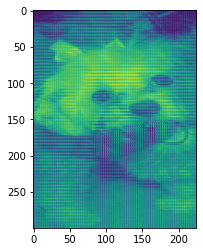

In [38]:
plt.imshow(x_train[1200].reshape(300, -1))

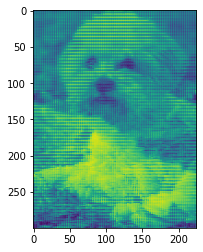

In [44]:
plt.imshow(x_train[1401].reshape(300, -1))

#Logistic Regression - One vs Rest

In [ ]:
#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,
#                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                   warm_start=False)

In [8]:
lr = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=100)
lr.fit(x_train, y_train)

#Time required to train : 50 mins for 20 labels

LogisticRegression(multi_class='ovr', solver='liblinear')

In [9]:
y_pred = lr.predict(x_train)
print("Training Accuracy : ",metrics.accuracy_score(y_train, y_pred)*100, "%")

Training Accuracy :  100.0 %


In [10]:
import pickle
filename = 'lr_10.sav'
pickle.dump(lr, open(filename, 'wb'))
lr = pickle.load(open(filename, 'rb'))

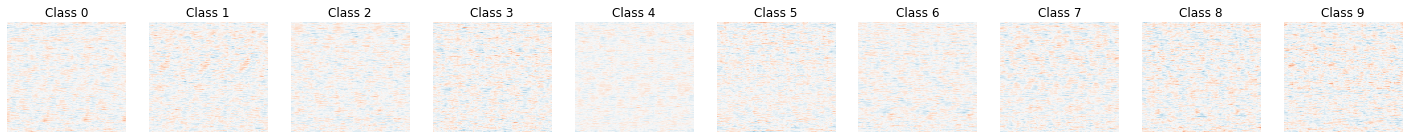

In [11]:
scale = np.max(np.abs(lr.coef_))

p = plt.figure(figsize=(25, 5));

for i in range(nclasses):
    p = plt.subplot(1, nclasses, i + 1)
    p = plt.imshow(lr.coef_[i].reshape(250, 270),cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

In [12]:
y_pred = lr.predict(x_test)

In [13]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25        38
           1       0.22      0.21      0.21        39
           2       0.13      0.09      0.11        34
           3       0.09      0.10      0.10        30
           4       0.39      0.41      0.40        34
           5       0.27      0.25      0.26        48
           6       0.20      0.10      0.13        30
           7       0.24      0.22      0.23        37
           8       0.32      0.57      0.41        51
           9       0.29      0.21      0.24        43

    accuracy                           0.26       384
   macro avg       0.24      0.24      0.23       384
weighted avg       0.25      0.26      0.24       384



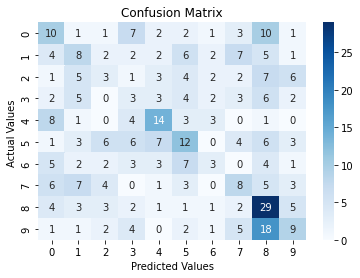

In [14]:
cf_matrix = metrics.confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [17]:
print("Balanced Accuracy : ",metrics.balanced_accuracy_score(y_test, y_pred)*100, "%")

Balanced Accuracy :  24.12432092643051 %


In [15]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy :  25.78125 %


#Logistic Regression - Multinomial

In [16]:
lr_multi = linear_model.LogisticRegression(multi_class='multinomial', solver='saga',  max_iter=100)
lr_multi.fit(x_train, y_train)

#Time required to train : 90 mins for 20 labels

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(multi_class='multinomial', solver='saga')

In [18]:
import pickle
filename = 'lm_10.sav'
pickle.dump(lr_multi, open(filename, 'wb'))
lr_multi = pickle.load(open(filename, 'rb'))

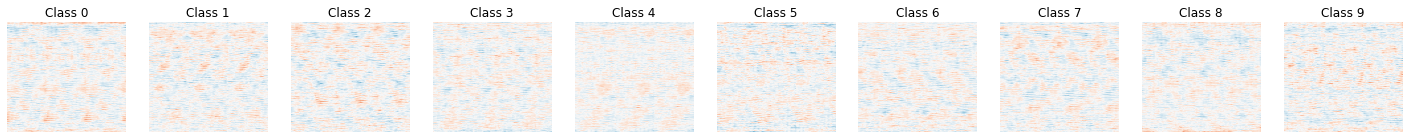

In [19]:
scale = np.max(np.abs(lr_multi.coef_))

p = plt.figure(figsize=(25, 5));

for i in range(nclasses):
    p = plt.subplot(1, nclasses, i + 1)
    p = plt.imshow(lr_multi.coef_[i].reshape(250, 270),cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);

In [20]:
y_pred_m = lr_multi.predict(x_test)

In [21]:
print(metrics.classification_report(y_test, y_pred_m))

              precision    recall  f1-score   support

           0       0.33      0.37      0.35        38
           1       0.31      0.28      0.30        39
           2       0.21      0.18      0.19        34
           3       0.12      0.10      0.11        30
           4       0.44      0.44      0.44        34
           5       0.37      0.35      0.36        48
           6       0.32      0.20      0.24        30
           7       0.31      0.30      0.31        37
           8       0.39      0.61      0.48        51
           9       0.15      0.14      0.14        43

    accuracy                           0.31       384
   macro avg       0.30      0.30      0.29       384
weighted avg       0.30      0.31      0.30       384



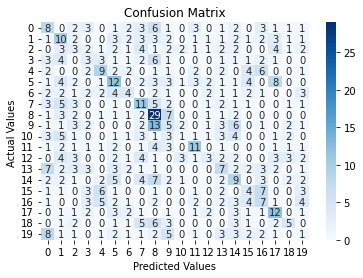

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test,y_pred_m)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [22]:
print("Balanced Accuracy : ",metrics.balanced_accuracy_score(y_test, y_pred_m)*100, "%")

Balanced Accuracy :  29.669613784461863 %


In [23]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred_m)*100, "%")

Accuracy :  31.25 %
